In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
df=pd.read_csv("tvmarketing.csv")

### 1. Import dataset and display first 5 rows

In [28]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


### 2. Check column data types

In [29]:
df.dtypes

TV       float64
Sales    float64
dtype: object

### 3. Check the shape of the Data Frame (rows, columns)

In [30]:
df.shape

(200, 2)

### 4. Look at summary statistics

In [31]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


### 5. Visualize the relationship between the features and the dependent variable using scatterplots

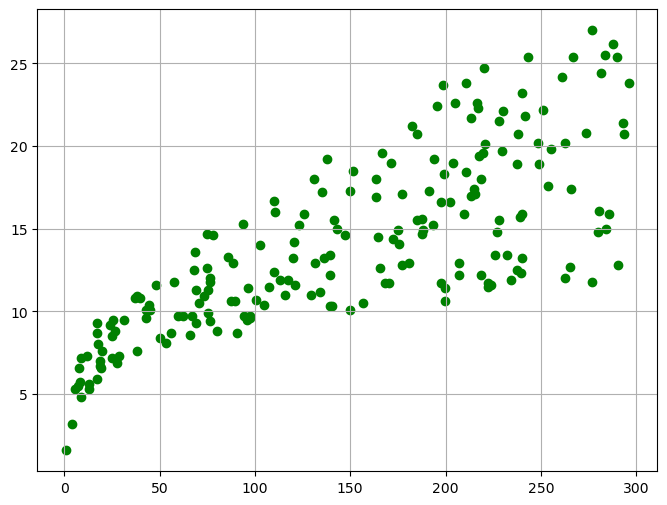

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(df['TV'],df['Sales'],color='green')
plt.grid(True)
plt.show()

### 6. Prepare X (feature variables) and y (response variable)

In [33]:
X=df[['TV']]
y=df[['Sales']]

### 7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 8. Print the shape of train data and test data

In [35]:
print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (140, 1) (140, 1)
Test data shape: (60, 1) (60, 1)


### 9. Perform Linear Regression (on train data) without using any library and print the coefficients values

In [18]:
X_train_np=X_train.to_numpy().flatten()
y_train_np=y_train.to_numpy()

X_mean = np.mean(X_train_np)
y_mean = np.mean(y_train_np)

numerator = np.sum( (X_train_np - X_mean) * (y_train_np - y_mean) )
denominator = np.sum( (X_train_np - X_mean) ** 2)

beta1 = numerator / denominator
beta0 = y_mean - (beta1 * X_mean)

print("\nManually Computed Coefficients:")
print(f"Intercept (β₀): {beta0}")
print(f"Slope (β₁): {beta1}")


Manually Computed Coefficients:
Intercept (β₀): 14.49714285714286
Slope (β₁): -1.0108632568250123e-17


### 10.Create the model using the calculated coefficients and make predictions on the testing set

In [20]:
y_pred_manual = beta0 + beta1 * X_test.to_numpy().flatten()

### 11.Perform Linear Regression using library(sklearn)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

intercept_sklearn = model.intercept_
coefficient_sklearn = model.coef_[0]

### 12.Print the intercept and coefficients

In [23]:
print("\nSklearn Computed Coefficients:")
print(f"Intercept (β₀): {intercept_sklearn}")
print(f"Slope (β₁): {coefficient_sklearn}")


Sklearn Computed Coefficients:
Intercept (β₀): [7.23945983]
Slope (β₁): [0.0464078]


### 13.Make predictions on the testing set - y_pred

In [24]:
y_pred_sklearn = model.predict(X_test)

### 14.Plot train data and the model

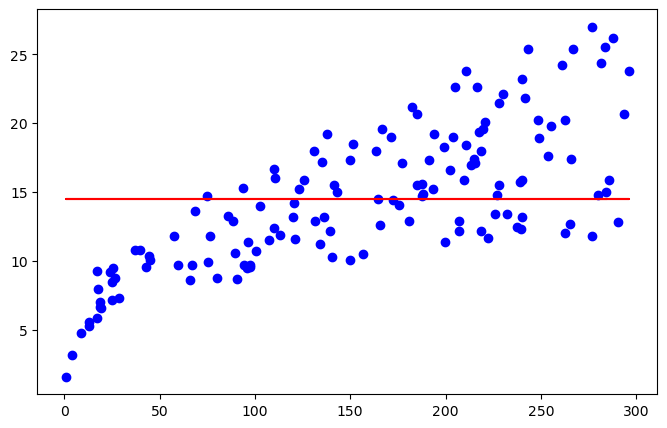

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, beta0 + beta1 * X_train, color='red')
plt.show()

### 15.Plot test data and the model

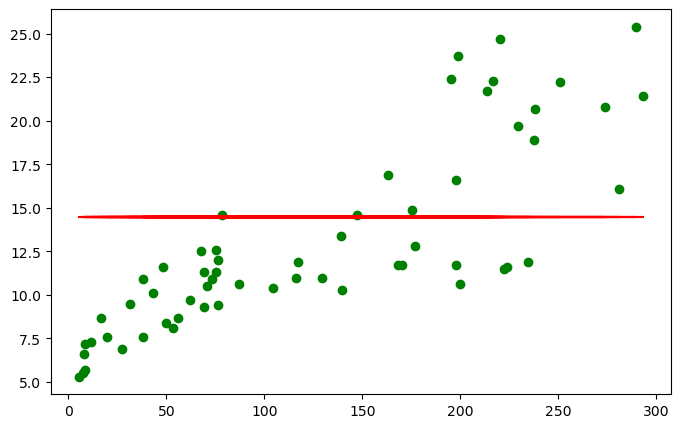

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, beta0 + beta1 * X_test, color='red')
plt.show()

### 16.Print Mean Squared Error and R Squared Value

In [25]:
mse = mean_squared_error(y_test, y_pred_sklearn)
r2 = r2_score(y_test, y_pred_sklearn)
print(f"Mean Squared Error: {mse}")
print(f"R Squared Value: {r2}")

Mean Squared Error: 8.970991242413616
R Squared Value: 0.6714477229302764


### 17.Calculate and print R Squared and Adjusted R Squared values without any library

In [18]:
df.columns = df.columns.str.strip()

# Define X (independent variables) and y (dependent variable)
X = df.drop(columns=["Sales"])  # Assuming 'Sales' is the target variable
y = df["Sales"]

# Add intercept (column of ones) for manual calculations
X = np.c_[np.ones(X.shape[0]), X]  # Add intercept term (bias)

# Calculate coefficients using Normal Equation: β = (X'X)^(-1) X'Y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Predict y using computed coefficients
y_pred = X @ beta

# Compute R-Squared
SSR = np.sum((y - y_pred) ** 2)  # Sum of squared residuals
SST = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
R_squared = 1 - (SSR / SST)

# Compute Adjusted R-Squared
n = X.shape[0]  # Number of observations
p = X.shape[1] - 1  # Number of independent variables
Adjusted_R_squared = 1 - ( (1 - R_squared) * (n - 1) / (n - p - 1) )

# Print results
print(f"R-Squared: {R_squared:.4f}")
print(f"Adjusted R-Squared: {Adjusted_R_squared:.4f}")

R-Squared: 0.6119
Adjusted R-Squared: 0.6099
